In [230]:
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import matplotlib.pyplot as plt
import networkx as nx
from fuzzywuzzy import process

In [231]:
# Load the provided CSV file
position = 'Fire'
file_path = f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position.lower()}_salaries.csv"
df = pd.read_csv(file_path, encoding='latin1')

df['Total pay + benefits'] = df['Total pay'] + df['Benefits']
df['Regular pay + other pay + benefits'] = df['Regular pay'] + df['Other pay'] + df['Benefits']

df

,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Total pay & benefits,Pension debt,Total pay + benefits,Regular pay + other pay + benefits
0,2011,Carlsbad,"Crawford, Kevin C.",Fire Chief,174153.81,6682.80,370.54,181207.15,86767.65,267974.80,NaN,267974.80,261292.00
1,2011,Carlsbad,"Anderson, William E.",Fire Division Chief,128375.77,13840.22,5470.57,147686.56,70266.40,217952.96,NaN,217952.96,204112.74
2,2011,Carlsbad,"Lopez, Miguel A.",Fire Battalion Chief,120803.50,23914.68,8486.74,153204.92,64593.82,217798.74,NaN,217798.74,193884.06
3,2011,Carlsbad,"Davis, Michael R.",Fire Battalion Chief,120803.54,20135.84,7408.95,148348.33,67948.11,216296.44,NaN,216296.44,196160.60
4,2011,Carlsbad,"Heiser, Christopher",Fire Division Chief,139429.59,4012.75,0.00,143442.34,72681.08,216123.42,NaN,216123.42,212110.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21274,2022,Vista,Andrew Martinez,"Fire Fighter/Pm A,B,C",12230.03,0.00,1058.00,13288.03,1701.98,2452.25,17442.26,14990.01,14990.01
21275,2022,Vista,James Kozakiewicz,Fire Inspector,11049.07,0.00,0.00,11049.07,1577.92,2928.32,15555.31,12626.99,12626.99
21276,2022,Vista,Brooke Dunn,Fire Inspector,10287.15,0.00,757.00,11044.15,1251.82,2726.98,15022.95,12295.97,12295.97
21277,2022,Vista,David Chu,"Fire Fighter/Pm A,B,C",7870.07,0.00,782.00,8652.07,1144.58,1541.25,11337.90,9796.65,9796.65


In [232]:
county_df = pd.read_csv("C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts\SDCountyEmployee_data.csv", encoding='latin1')

include_filter = county_df['Position'].str.contains('|'.join([position]), case=False, na=False)

# Apply both filters
filtered_county_df = county_df[include_filter]

filtered_county_df

C:\Users\Ericm\AppData\Local\Temp\ipykernel_37880\357851414.py:1: DtypeWarning: Columns (5,6,7,27) have mixed types. Specify dtype option on import or set low_memory=False.
  county_df = pd.read_csv("C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts\SDCountyEmployee_data.csv", encoding='latin1')


,Year,EmployerType,EmployerName,DepartmentOrSubdivision,Position,ElectedOfficial,Judicial,OtherPositions,MinPositionSalary,MaxPositionSalary,...,HealthDentalVision,TotalRetirementAndHealthContribution,PensionFormula,EmployerURL,EmployerPopulation,LastUpdatedDate,EmployerCounty,SpecialDistrictActivities,IncludesUnfundedLiability,SpecialDistrictType
11293,2009,County,San Diego,Planning & Land Use,Fire Code Spec I,NaN,NaN,NaN,51209.0,62233.0,...,6192.0,10472.0,3@60,http://www.sdcounty.ca.gov/hr/,3091579,05/18/2016,San Diego,NaN,NaN,NaN
11294,2009,County,San Diego,Planning & Land Use,Fire Code Spec II,NaN,NaN,NaN,58219.0,70761.0,...,6192.0,9723.0,3@60,http://www.sdcounty.ca.gov/hr/,3091579,05/18/2016,San Diego,NaN,NaN,NaN
11295,2009,County,San Diego,Planning & Land Use,Fire Code Spec II,NaN,NaN,NaN,58219.0,70761.0,...,3470.0,6305.0,NaN,http://www.sdcounty.ca.gov/hr/,3091579,05/18/2016,San Diego,NaN,NaN,NaN
11296,2009,County,San Diego,Planning & Land Use,Fire Services Coordinator,NaN,NaN,NaN,54080.0,101920.0,...,7464.0,15521.0,3@60,http://www.sdcounty.ca.gov/hr/,3091579,05/18/2016,San Diego,NaN,NaN,NaN
11297,2009,County,San Diego,Planning & Land Use,Fire Services Coordinator,NaN,NaN,NaN,54080.0,101920.0,...,5244.0,13301.0,3@60,http://www.sdcounty.ca.gov/hr/,3091579,05/18/2016,San Diego,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645555,2023,City,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",False,False,NaN,91176.0,110868.0,...,3710.0,10362.0,2.7% @ 57,https://www.cityofvista.com/departments/human-...,99723,06/25/2024,San Diego,NaN,False,NaN
645556,2023,City,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",False,False,NaN,91176.0,110868.0,...,3080.0,8039.0,2.7% @ 57,https://www.cityofvista.com/departments/human-...,99723,06/25/2024,San Diego,NaN,False,NaN
645557,2023,City,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",False,False,NaN,91176.0,110868.0,...,3710.0,10362.0,2.7% @ 57,https://www.cityofvista.com/departments/human-...,99723,06/25/2024,San Diego,NaN,False,NaN
645558,2023,City,Vista,Fire Suppression,"Fire Fighter/Pm A,B,C",False,False,NaN,91176.0,110868.0,...,924.0,1455.0,2.7% @ 57,https://www.cityofvista.com/departments/human-...,99723,06/25/2024,San Diego,NaN,False,NaN


In [233]:
# Create a function to find the best match for a job title within a list of candidates
def find_best_match(job_title, candidates):
    best_match, score = process.extractOne(job_title, candidates)
    return best_match

# Create a dictionary to store best matches for unique positions
position_match_dict = {}
for year in df['Year'].unique():
    position_match_dict[int(year)] = {}
    for city in df['City'].unique():
        position_match_dict[int(year)][str(city)] = {}

# Iterate through each unique combination of city and year in the police_salaries_df
for (city, year), group in df.groupby(['City', 'Year']):
    # Get unique job titles for this city and year
    unique_positions = group['Job title'].unique()
    
    # Filter the SDCountyEmployee_data for the same city and year
    filtered_city_df = filtered_county_df[
        (filtered_county_df['Year'] == int(year)) &
        (filtered_county_df['EmployerName'].str.contains(str(city), case=False))
    ]
    
    # If the filtered county DataFrame is not empty, proceed with matching
    if not filtered_city_df.empty:
        city_positions = filtered_city_df['Position'].unique().tolist()
        for indiv_position in unique_positions:
            # Find the best match for each unique position in the filtered county DataFrame
            best_match = find_best_match(indiv_position, city_positions)
            if best_match:
                position_match_dict[int(year)][str(city)][indiv_position] = best_match
            else:
                print('Error: No Match Found')

In [234]:
with open(f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position.lower()}_salaries_corrected_positions.txt", 'r') as file:
    for line in file:
        elems = line.split(' | ')
        elems2 = elems[1].split(' : ')
        year = int(elems[0][0:4])
        city = elems[0][5:]
        indiv_position = elems2[0]
        match = elems2[1]
        position_match_dict[year][city][indiv_position] = match

In [235]:
# Prepare lists to hold the results
min_salaries = []
max_salaries = []

for (city, year), group in df.groupby(['City', 'Year']):
    
    filtered_city_df = filtered_county_df[
        (filtered_county_df['Year'] == int(year)) &
        (filtered_county_df['EmployerName'].str.contains(str(city), case=False))
    ]
    if not filtered_city_df.empty:
        # Now, iterate through the original group to assign salaries based on the best match
        for index, row in group.iterrows():
            job_title = str(row['Job title'])
            
            best_match = str(position_match_dict[int(year)][str(city)].get(job_title)).strip()
            
            matched_row = filtered_city_df[filtered_city_df['Position'] == best_match]
            if not matched_row.empty:
                min_salaries.append(matched_row['MinPositionSalary'].values.max())
                max_salaries.append(matched_row['MaxPositionSalary'].values.max())
            else:
                print(year,city, job_title, best_match)
                min_salaries.append(None)
                max_salaries.append(None)
    else:
        # If no match is found, append None or some default value for the entire group
        min_salaries.extend([None] * len(group))
        max_salaries.extend([None] * len(group))

# Attach the results to the police_salaries DataFrame
df['MinPositionSalary'] = min_salaries
df['MaxPositionSalary'] = max_salaries

df

,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Total pay & benefits,Pension debt,Total pay + benefits,Regular pay + other pay + benefits,MinPositionSalary,MaxPositionSalary
0,2011,Carlsbad,"Crawford, Kevin C.",Fire Chief,174153.81,6682.80,370.54,181207.15,86767.65,267974.80,NaN,267974.80,261292.00,124300.0,180300.0
1,2011,Carlsbad,"Anderson, William E.",Fire Division Chief,128375.77,13840.22,5470.57,147686.56,70266.40,217952.96,NaN,217952.96,204112.74,108100.0,154600.0
2,2011,Carlsbad,"Lopez, Miguel A.",Fire Battalion Chief,120803.50,23914.68,8486.74,153204.92,64593.82,217798.74,NaN,217798.74,193884.06,88500.0,128300.0
3,2011,Carlsbad,"Davis, Michael R.",Fire Battalion Chief,120803.54,20135.84,7408.95,148348.33,67948.11,216296.44,NaN,216296.44,196160.60,88500.0,128300.0
4,2011,Carlsbad,"Heiser, Christopher",Fire Division Chief,139429.59,4012.75,0.00,143442.34,72681.08,216123.42,NaN,216123.42,212110.67,108100.0,154600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21274,2022,Vista,Andrew Martinez,"Fire Fighter/Pm A,B,C",12230.03,0.00,1058.00,13288.03,1701.98,2452.25,17442.26,14990.01,14990.01,85620.0,104100.0
21275,2022,Vista,James Kozakiewicz,Fire Inspector,11049.07,0.00,0.00,11049.07,1577.92,2928.32,15555.31,12626.99,12626.99,72408.0,97056.0
21276,2022,Vista,Brooke Dunn,Fire Inspector,10287.15,0.00,757.00,11044.15,1251.82,2726.98,15022.95,12295.97,12295.97,72408.0,97056.0
21277,2022,Vista,David Chu,"Fire Fighter/Pm A,B,C",7870.07,0.00,782.00,8652.07,1144.58,1541.25,11337.90,9796.65,9796.65,85620.0,104100.0


In [236]:
# Define a function to determine 'FT or PT' status
def determine_ft_or_pt(row):
    if pd.isna(row['MinPositionSalary']) or row['MinPositionSalary'] <= 0:
        if 0 < row['Regular pay'] < 30000:
            return 'PT'
        elif row['Regular pay'] >= 30000:
            return 'FT'
        else:
            return ''
    elif row['Regular pay'] >= row['MinPositionSalary']*0.9:
        return 'FT'
    elif 0 < row['Regular pay'] < row['MinPositionSalary']*0.9:
        return 'PT'
    else:
        return ''

# Apply the function to each row to create the 'FT or PT' column
df['FT or PT'] = df.apply(determine_ft_or_pt, axis=1)

# Display the updated DataFrame
df

,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Total pay & benefits,Pension debt,Total pay + benefits,Regular pay + other pay + benefits,MinPositionSalary,MaxPositionSalary,FT or PT
0,2011,Carlsbad,"Crawford, Kevin C.",Fire Chief,174153.81,6682.80,370.54,181207.15,86767.65,267974.80,NaN,267974.80,261292.00,124300.0,180300.0,FT
1,2011,Carlsbad,"Anderson, William E.",Fire Division Chief,128375.77,13840.22,5470.57,147686.56,70266.40,217952.96,NaN,217952.96,204112.74,108100.0,154600.0,FT
2,2011,Carlsbad,"Lopez, Miguel A.",Fire Battalion Chief,120803.50,23914.68,8486.74,153204.92,64593.82,217798.74,NaN,217798.74,193884.06,88500.0,128300.0,FT
3,2011,Carlsbad,"Davis, Michael R.",Fire Battalion Chief,120803.54,20135.84,7408.95,148348.33,67948.11,216296.44,NaN,216296.44,196160.60,88500.0,128300.0,FT
4,2011,Carlsbad,"Heiser, Christopher",Fire Division Chief,139429.59,4012.75,0.00,143442.34,72681.08,216123.42,NaN,216123.42,212110.67,108100.0,154600.0,FT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21274,2022,Vista,Andrew Martinez,"Fire Fighter/Pm A,B,C",12230.03,0.00,1058.00,13288.03,1701.98,2452.25,17442.26,14990.01,14990.01,85620.0,104100.0,PT
21275,2022,Vista,James Kozakiewicz,Fire Inspector,11049.07,0.00,0.00,11049.07,1577.92,2928.32,15555.31,12626.99,12626.99,72408.0,97056.0,PT
21276,2022,Vista,Brooke Dunn,Fire Inspector,10287.15,0.00,757.00,11044.15,1251.82,2726.98,15022.95,12295.97,12295.97,72408.0,97056.0,PT
21277,2022,Vista,David Chu,"Fire Fighter/Pm A,B,C",7870.07,0.00,782.00,8652.07,1144.58,1541.25,11337.90,9796.65,9796.65,85620.0,104100.0,PT


In [237]:
standard_titles = [
    'POLICE OFFICER', 'POLICE DISPATCHER', 'POLICE SERGEANT',
    'POLICE RECRUIT', 'POLICE CORPORAL', 'POLICE DETECTIVE',
    'POLICE RECORDS CLERK', 'POLICE SERVICES SPEC', 'POLICE CHIEF',
    'POLICE LIEUTENANT', 'POLICE CAPTAIN', 'ASSISTANT POLICE CHIEF',
    'POLICE PROPERTY AND EVIDENCE SPEC', 'POLICE RECORDS SPEC',
    'POLICE SERVICES OFFICER', 'POLICE DISPATCH SUPERVISOR',
    'POLICE RECORDS SUPERVISOR', 'POLICE COMMANDER',
    'POLICE TECHNOLOGY SPEC', 'POLICE SERVICES MANAGER',
    'POLICE TRAINING COORDINATOR', 'RESERVE POLICE OFFICER', 'POLICE AGENT',
    'Police Investigative Service Officer'
]

def match_title(title):
    best_match, score = process.extractOne(title, standard_titles)
    if score > 90:
        return best_match.title()
    else:
        return title.title()
    
position_match_dict = {}

unique_positions = df['Job title'].unique()

for indiv_position in unique_positions:
            # Find the best match for each unique position
            position_match_dict[indiv_position] = match_title(indiv_position)
            
position_match_dict

{'Fire Chief': 'Fire Chief',
 'Fire Division Chief': 'Fire Division Chief',
 'Fire Battalion  Chief': 'Fire Battalion  Chief',
 'Fire Captain': 'Fire Captain',
 'Fire Engineer': 'Fire Engineer',
 'Deputy Fire Marshall': 'Deputy Fire Marshall',
 'Fire Prevention Specialist II': 'Fire Prevention Specialist Ii',
 'H/Fire Sworn': 'H/Fire Sworn',
 'Fire Marshal': 'Fire Marshal',
 'Deputy Fire Marshal': 'Deputy Fire Marshal',
 'Fire Captain Specialist - OF': 'Fire Captain Specialist - Of',
 'Assistant Fire Marshal': 'Assistant Fire Marshal',
 'Fire Permit Technician II': 'Fire Permit Technician Ii',
 'Fire Prevention Spec I - UF': 'Fire Prevention Spec I - Uf',
 'Fire Battalion Chief': 'Fire Battalion Chief',
 'Assistant Fire Chief': 'Assistant Fire Chief',
 'Fire Prevention Specialist Ii': 'Fire Prevention Specialist Ii',
 'Fire Permit Technician Ii': 'Fire Permit Technician Ii',
 'Fire Prevention Specialist I': 'Fire Prevention Specialist I',
 'Fire Captain - Admin Assignment': 'Fire Capta

In [238]:
df['Job title'] = df['Job title'].map(position_match_dict)

df['Job title']. unique()

array(['Fire Chief', 'Fire Division Chief', 'Fire Battalion  Chief',
       'Fire Captain', 'Fire Engineer', 'Deputy Fire Marshall',
       'Fire Prevention Specialist Ii', 'H/Fire Sworn', 'Fire Marshal',
       'Deputy Fire Marshal', 'Fire Captain Specialist - Of',
       'Assistant Fire Marshal', 'Fire Permit Technician Ii',
       'Fire Prevention Spec I - Uf', 'Fire Battalion Chief',
       'Assistant Fire Chief', 'Fire Prevention Specialist I',
       'Fire Captain - Admin Assignment',
       'Fire Battalion Chief - Scott Tucker',
       'Senior Fire Inspector/Investigator', 'Fire Inspector',
       'Fire Battalion Chief (112 Hr)', 'Fire Captain (112 Hr)',
       'Fire Captain (80 Hr)', 'Deputy Fire Chief', 'Fire Eng (112 Hr)',
       'Fire Prev Eng/Invest', 'Sr Fire Insp/Invest',
       'Fire Insp/Invest Ii', 'Fire Apparatus Mech',
       'Fire Insp/Invest Ii Hourly', 'Fire Battalion Chief (80 Hr)',
       'Fire Battalion Chief (Interim)', 'Fire Captain (Interim)',
       'Fire E

In [239]:
#Adjust for inflation
cpi_df = pd.read_csv("C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts\SeriesReport-20240712171831_4c56aa.csv")
base_year_cpi = cpi_df['Annual'].iloc[3]
cpi_df['Inflation_index'] = 1 + (cpi_df['Annual'] - base_year_cpi) / base_year_cpi

cpi_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2,Inflation_index
0,2008,211.080,211.693,213.528,214.823,216.632,218.815,219.964,219.086,218.783,216.573,212.425,210.228,215.303,214.429,216.177,0.957162
1,2009,211.143,212.193,212.709,213.240,213.856,215.693,215.351,215.834,215.969,216.177,216.330,215.949,214.537,213.139,215.935,0.953756
2,2010,216.687,216.741,217.631,218.009,218.178,217.965,218.011,218.312,218.439,218.711,218.803,219.179,218.056,217.535,218.576,0.969401
3,2011,220.223,221.309,223.467,224.906,225.964,225.722,225.922,226.545,226.889,226.421,226.230,225.672,224.939,223.598,226.280,1.000000
4,2012,226.665,227.663,229.392,230.085,229.815,229.478,229.104,230.379,231.407,231.317,230.221,229.601,229.594,228.850,230.338,1.020694
5,2013,230.280,232.166,232.773,232.531,232.945,233.504,233.596,233.877,234.149,233.546,233.069,233.049,232.957,232.366,233.548,1.035645
6,2014,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812,236.736,236.384,237.088,1.052445
7,2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525,237.017,236.265,237.769,1.053695
8,2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432,240.007,238.778,241.237,1.066987
9,2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524,245.120,244.076,246.163,1.089718


In [240]:
df = pd.merge(df, cpi_df[['Year', 'Inflation_index']],on='Year', how='left')
numIndices = len(df)

for column in df.columns[4:15]:
    df[f'Adjusted {column.lower()}'] = df[column] / df['Inflation_index']


df

,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Total pay & benefits,...,Adjusted overtime pay,Adjusted other pay,Adjusted total pay,Adjusted benefits,Adjusted total pay & benefits,Adjusted pension debt,Adjusted total pay + benefits,Adjusted regular pay + other pay + benefits,Adjusted minpositionsalary,Adjusted maxpositionsalary
0,2011,Carlsbad,"Crawford, Kevin C.",Fire Chief,174153.81,6682.80,370.54,181207.15,86767.65,267974.80,...,6682.80000,370.540000,181207.150000,86767.650000,267974.800000,NaN,267974.800000,261292.000000,124300.000000,180300.000000
1,2011,Carlsbad,"Anderson, William E.",Fire Division Chief,128375.77,13840.22,5470.57,147686.56,70266.40,217952.96,...,13840.22000,5470.570000,147686.560000,70266.400000,217952.960000,NaN,217952.960000,204112.740000,108100.000000,154600.000000
2,2011,Carlsbad,"Lopez, Miguel A.",Fire Battalion Chief,120803.50,23914.68,8486.74,153204.92,64593.82,217798.74,...,23914.68000,8486.740000,153204.920000,64593.820000,217798.740000,NaN,217798.740000,193884.060000,88500.000000,128300.000000
3,2011,Carlsbad,"Davis, Michael R.",Fire Battalion Chief,120803.54,20135.84,7408.95,148348.33,67948.11,216296.44,...,20135.84000,7408.950000,148348.330000,67948.110000,216296.440000,NaN,216296.440000,196160.600000,88500.000000,128300.000000
4,2011,Carlsbad,"Heiser, Christopher",Fire Division Chief,139429.59,4012.75,0.00,143442.34,72681.08,216123.42,...,4012.75000,0.000000,143442.340000,72681.080000,216123.420000,NaN,216123.420000,212110.670000,108100.000000,154600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21274,2022,Vista,Andrew Martinez,"Fire Fighter/Pm A,B,C",12230.03,0.00,1058.00,13288.03,1701.98,2452.25,...,0.00000,813.194587,10213.378142,1308.167225,1884.835942,13406.381310,11521.545367,11521.545367,65808.809622,80012.813381
21275,2022,Vista,James Kozakiewicz,Fire Inspector,11049.07,0.00,0.00,11049.07,1577.92,2928.32,...,0.00000,0.000000,8492.480076,1212.812858,2250.750448,11956.043382,9705.292934,9705.292934,55653.869273,74598.689870
21276,2022,Vista,Brooke Dunn,Fire Inspector,10287.15,0.00,757.00,11044.15,1251.82,2726.98,...,0.00000,581.841496,8488.698491,962.167532,2095.997520,11546.863543,9450.866023,9450.866023,55653.869273,74598.689870
21277,2022,Vista,David Chu,"Fire Fighter/Pm A,B,C",7870.07,0.00,782.00,8652.07,1144.58,1541.25,...,0.00000,601.056869,6650.110108,879.741267,1184.627749,8714.479124,7529.851376,7529.851376,65808.809622,80012.813381


In [241]:
'''# Define the keywords for positions to include and exclude
include_keywords = {}
include_keywords['Police'] = ['Police Officer', 'Police Detective', 'Police Agent', 'Police Corporal',
                    'Police Sergeant', 'Police Lieutenant', 'Police Captain', 'Police Chief', 'Chief of Police']
include_keywords['Police Officer'] = ['Police Officer']
include_keywords['Engineer'] = ['Engineer']
include_keywords['Fire'] = ['Fire']

exclude_keywords = {}
exclude_keywords['Police'] = ['Assistant', 'Secretary', 'Assist', 'Asst', 'Trainee', 'tied', 'Reserve', 'Temp', 'Security'
                                                                                                    'Terminal', 'Recruit']
exclude_keywords['Police Officer'] = ['Assistant', 'Secretary', 'Assist', 'Asst', 'Trainee', 'tied', 'Reserve', 'Temp', 'Security'
                                                                                                            'Terminal', 'Recruit']
exclude_keywords['Engineer'] = ['Assistant', 'Assist', 'Asst', 'Student', 'Aide', 'Fire']
exclude_keywords['Fire'] = ['Assistant', 'Assist', 'Asst', 'Volunteer', 'Student', 'Aide']

position = 'Police'

# Filter for positions that contain one of the include keywords
include_filter = df['Job title'].str.contains('|'.join(include_keywords[position]), case=False, na=False)

# Exclude positions containing the exclude keywords
exclude_filter = ~df['Job title'].str.contains('|'.join(exclude_keywords[position]), case=False, na=False)

# Apply both filters
filtered_df = df[include_filter]

#filtered_df.to_csv(f"C:/Users/Ericm\PycharmProjects\wageData\.venv\Scripts/{position}WageDataAdjusted.csv")

filtered_df'''

'# Define the keywords for positions to include and exclude\ninclude_keywords = {}\ninclude_keywords[\'Police\'] = [\'Police Officer\', \'Police Detective\', \'Police Agent\', \'Police Corporal\',\n                    \'Police Sergeant\', \'Police Lieutenant\', \'Police Captain\', \'Police Chief\', \'Chief of Police\']\ninclude_keywords[\'Police Officer\'] = [\'Police Officer\']\ninclude_keywords[\'Engineer\'] = [\'Engineer\']\ninclude_keywords[\'Fire\'] = [\'Fire\']\n\nexclude_keywords = {}\nexclude_keywords[\'Police\'] = [\'Assistant\', \'Secretary\', \'Assist\', \'Asst\', \'Trainee\', \'tied\', \'Reserve\', \'Temp\', \'Security\'\n                                                                                                    \'Terminal\', \'Recruit\']\nexclude_keywords[\'Police Officer\'] = [\'Assistant\', \'Secretary\', \'Assist\', \'Asst\', \'Trainee\', \'tied\', \'Reserve\', \'Temp\', \'Security\'\n                                                                              

In [242]:
def normalize_name(name):
    name = name.strip()
    
    # Check if the name is already in "Lastname, Firstname Middlename/Initial" format
    if "," in name:
        return name.title()  # Capitalize the entire string appropriately
    
    # Split the name into parts
    parts = name.split()
    
    if len(parts) == 1:
        # If there's only one part, it's just a last name, so we return it as is
        return name.title()
    
    if len(parts) == 2:
        # If there are two parts, assume it's "Firstname Lastname"
        firstname, lastname = parts
        return f"{lastname.title()}, {firstname.title()}"
    
    # If there are three or more parts
    firstname = parts[0].title()
    lastname = parts[-1].title()
    middle = " ".join([part.title() for part in parts[1:-1]])  # Capitalize each part of the middle names/initials
    return f"{lastname}, {firstname} {middle}"

df['Name'] = df['Name'].apply(normalize_name)

# Split the normalized names into 'Last', 'First', and 'Middle' components
df[['Last', 'First_Middle']] = df['Name'].str.split(', ', expand=True)
df[['First', 'Middle']] = df['First_Middle'].str.split(n=1, expand=True)

def remove_suffix(lastname):
    parts = lastname.split(' ')
    
    # List of common suffixes
    suffixes = ['Jr', 'Sr', 'I', 'II', 'III', 'IV', 'V']
    
    # Check if the last part of the lastname is a suffix and remove it
    if len(parts) > 1 and parts[-1].title() in suffixes:
        return " ".join(parts[:-1])  # Return the lastname without the suffix
    
    return lastname

# Function to handle conflicts with middle initials
def resolve_middle_names(group):
    # Check if there are multiple entries for the same year with 'FT' status
    full_time_same_year = group[(group['FT or PT'] == 'FT')].groupby('Year').size() > 1
    
    if len(group) == 1 or full_time_same_year.any():
        return group  # Only one name, nothing to change

    # Identify the different middle names
    unique_middle_names = group['Middle'].dropna().unique()
    
    if len(unique_middle_names) == 1:
        # If there's only one unique middle name, remove it unless they are working FT in the same year
        group['Middle'] = pd.NA
    return group

df['Last'] = df['Last'].apply(remove_suffix)

# Group by first and last name, and apply the function
df = df.groupby(['Last', 'First']).apply(resolve_middle_names).reset_index(drop=True)

# Reconstruct the full name with or without middle names
df['Name'] = df.apply(lambda x: f"{x['Last']}, {x['First']} {x['Middle']}".strip() if pd.notna(x['Middle']) and x['Middle'] else f"{x['Last']}, {x['First']}", axis=1)

# Drop temporary columns
df = df.drop(columns=['Last', 'First_Middle', 'First', 'Middle'])

df.to_csv('C:/Users/Ericm/PycharmProjects/wageData/.venv/Scripts/police_salaries_cleaned.csv', index=False)

df

C:\Users\Ericm\AppData\Local\Temp\ipykernel_37880\1131450525.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Last', 'First']).apply(resolve_middle_names).reset_index(drop=True)


,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Total pay & benefits,...,Adjusted overtime pay,Adjusted other pay,Adjusted total pay,Adjusted benefits,Adjusted total pay & benefits,Adjusted pension debt,Adjusted total pay + benefits,Adjusted regular pay + other pay + benefits,Adjusted minpositionsalary,Adjusted maxpositionsalary
0,2021,San Diego,"A.M., Cody Price",Fire Fighter Ii,52916.00,37689.00,9001.00,99606.00,31645.00,0.00,...,31286.585124,7471.956080,82685.441318,26269.308983,0.000000,108954.750301,108954.750301,77668.165177,47673.254718,57549.253106
1,2016,Chula Vista,"Abasolo, Ruben",Fire Prevention Aide,29419.00,194.00,7919.00,37532.00,14819.00,52351.00,...,181.820389,7421.833284,35175.684659,13888.640919,49064.325578,NaN,49064.325578,48882.505189,26944.094593,32750.163187
2,2017,Chula Vista,"Abasolo, Ruben",Fire Prevention Aide,32255.00,575.00,7528.00,40358.00,17705.92,58063.92,...,527.659616,6908.211456,37035.281340,16248.172074,53283.453414,NaN,53283.453414,52755.793798,26847.321247,32633.223641
3,2018,Chula Vista,"Abasolo, Ruben",Fire Prevention Aide,34582.00,0.00,8048.00,42630.00,11765.00,8300.47,...,0.000000,7209.313448,38187.504012,10538.962813,7435.473409,56161.940234,48726.466825,48726.466825,27350.243315,33243.642069
4,2019,Chula Vista,"Abasolo, Ruben",Fire Prevention Aide,28875.00,0.00,6763.00,35638.00,9336.00,8015.96,...,0.000000,5950.404084,31355.981186,8214.249968,7052.816964,46623.048117,39570.231153,39570.231153,27400.189856,33304.841905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,2020,San Diego,"Zombro, Kelly",Deputy Fire Chief,163475.00,0.00,11940.00,175415.00,17456.00,192871.00,...,0.000000,10377.347408,152457.487066,15171.438556,167628.925621,NaN,167628.925621,167628.925621,43567.476622,160205.732639
21242,2021,San Diego,"Zombro, Kelly",Deputy Fire Chief,157512.00,0.00,12272.00,169784.00,16737.00,0.00,...,0.000000,10187.295302,140941.961014,13893.803901,0.000000,154835.764915,154835.764915,154835.764915,43270.271155,159129.171964
21243,2022,San Diego,"Zombro, Kelly",Deputy Fire Chief,91502.59,0.00,10977.04,102479.63,25554.51,72376.83,...,0.000000,8437.116743,78767.372820,19641.577711,55629.911546,154038.854390,98408.950530,98408.950530,48377.391806,177921.287991
21244,2023,San Diego,"Zombro, Kelly",Deputy Fire Chief,0.00,0.00,43277.00,43277.00,15300.00,49393.46,...,0.000000,31948.215315,31948.215315,11294.860880,36463.546347,79706.622542,43243.076196,43243.076196,48783.463837,179424.401783


In [243]:
df.to_csv(f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position.lower()}_salaries_cleaned.csv")

In [244]:
filtered_df = df[~df['Name'].isin(['Provided, Not', 'Redacted'])]

# Sort by Name and Year to ensure we can track movements sequentially
filtered_df = filtered_df.sort_values(by=['Name', 'Year', 'City'])

# List to store names that meet the criteria
selected_names = set()

# Group by Name to analyze movements and pay changes
for name, group in filtered_df.groupby('Name'):
    # Sort the group by Year to track movements sequentially
    group = group.sort_values(by='Year')
    
    # Track the previous city and average total pay
    prev_city = None
    prev_avg_pay = None
    prev_ft_exists = False
    prev_pt_exists = False
    
    for i, row in group.iterrows():
        current_city = row['City']
        current_ft_exists = group[(group['City'] == current_city) & (group['FT or PT'] == 'FT')]['Adjusted regular pay + other pay + benefits'].count() > 0
        current_pt_exists = group[(group['City'] == current_city) & (group['FT or PT'] == 'PT')]['Adjusted regular pay + other pay + benefits'].count() > 0
        
        if prev_city is not None and current_city != prev_city:
            if prev_ft_exists and current_ft_exists:
                # Compare FT average wage
                prev_city_avg_pay = group[(group['City'] == prev_city) & (group['FT or PT'] == 'FT')]['Adjusted regular pay + other pay + benefits'].mean()
                current_city_avg_pay = group[(group['City'] == current_city) & (group['FT or PT'] == 'FT')]['Adjusted regular pay + other pay + benefits'].mean()
            elif prev_pt_exists and current_pt_exists:
                # Compare PT average wage
                prev_city_avg_pay = group[(group['City'] == prev_city) & (group['FT or PT'] == 'PT')]['Adjusted regular pay + other pay + benefits'].mean()
                current_city_avg_pay = group[(group['City'] == current_city) & (group['FT or PT'] == 'PT')]['Adjusted regular pay + other pay + benefits'].mean()
            else:
                # If neither FT nor PT is available in both cities, continue to the next person
                continue
            
            # Add the name to the set if the average pay in the new city is higher than in the previous city
            if current_city_avg_pay > prev_city_avg_pay:
                selected_names.add(name)
        
        # Update the previous city and flags for the next iteration
        prev_city = current_city
        prev_ft_exists = current_ft_exists
        prev_pt_exists = current_pt_exists

# Filter the original DataFrame to include all entries for the selected names
filtered_movements_df = filtered_df[filtered_df['Name'].isin(selected_names)]

print('# of Movements: ', filtered_movements_df['Name'].nunique())

filtered_movements_df

# of Movements:  26


,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Total pay & benefits,...,Adjusted overtime pay,Adjusted other pay,Adjusted total pay,Adjusted benefits,Adjusted total pay & benefits,Adjusted pension debt,Adjusted total pay + benefits,Adjusted regular pay + other pay + benefits,Adjusted minpositionsalary,Adjusted maxpositionsalary
974,2011,San Diego,"Ballard, Richard",Fire Battalion Chief,99911.22,55049.04,-1993.00,152967.26,7224.88,160192.14,...,55049.040000,-1993.000000,152967.260000,7224.880000,160192.140000,NaN,160192.140000,105143.100000,82722.000000,100110.000000
975,2012,San Diego,"Ballard, Richard",Fire Battalion Chief,100110.40,0.00,80482.41,180592.81,7224.88,187817.69,...,0.000000,78850.635570,176931.305211,7078.396135,184009.701346,NaN,184009.701346,184009.701346,81044.818061,98080.277751
976,2013,San Diego,"Ballard, Richard",Fire Battalion Chief,83650.54,93037.84,15339.33,192027.71,7806.04,199833.75,...,89835.629287,14811.375279,185418.429408,7537.368834,192955.798243,NaN,192955.798243,103120.168956,79874.843675,96664.377074
977,2014,San Diego,"Ballard, Richard",Fire Battalion Chief,62792.81,67930.13,11424.70,142147.64,9055.86,151203.50,...,64545.043897,10855.385718,135064.155827,8604.589469,143668.745296,NaN,143668.745296,79123.701399,78599.807203,95121.330469
978,2015,San Diego,"Ballard, Richard",Fire Battalion Chief,79043.18,55809.52,29367.47,164220.17,10682.96,174903.13,...,52965.557826,27870.951596,155851.777803,10138.573771,165990.351574,NaN,165990.351574,113024.793748,78506.621711,95008.557572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,2019,El Cajon,"Workman, Carisa",Deputy Fire Marshal,77.57,77.57,0.00,155.14,0.00,0.00,...,68.249718,0.000000,136.499437,0.000000,0.000000,136.499437,136.499437,68.249718,61399.230907,74813.375617
20969,2019,Santee,"Workman, Carisa",Fire Marshal,111529.00,0.00,0.00,111529.00,19049.00,13870.03,...,0.000000,0.000000,98128.436659,16760.202189,12203.501872,127092.140720,114888.638848,114888.638848,90248.528485,121835.909386
20970,2020,Santee,"Workman, Carisa",Fire Marshal,128247.00,0.00,0.00,128247.00,21013.00,17170.29,...,0.000000,0.000000,111462.619182,18262.914664,14923.120974,144648.654819,129725.533845,129725.533845,91378.019412,123360.065469
20971,2021,Santee,"Workman, Carisa",Fire Marshal,132440.00,0.00,1043.00,133483.00,22266.00,21678.59,...,0.000000,865.820486,110807.589538,18483.565612,17995.941824,147287.096974,129291.155150,129291.155150,88586.800697,119591.973410


In [245]:
filtered_movements_df.to_csv(f'C:/Users/Ericm/PycharmProjects/wageData/.venv/Scripts/{position.lower()}_salaries_movements.csv')

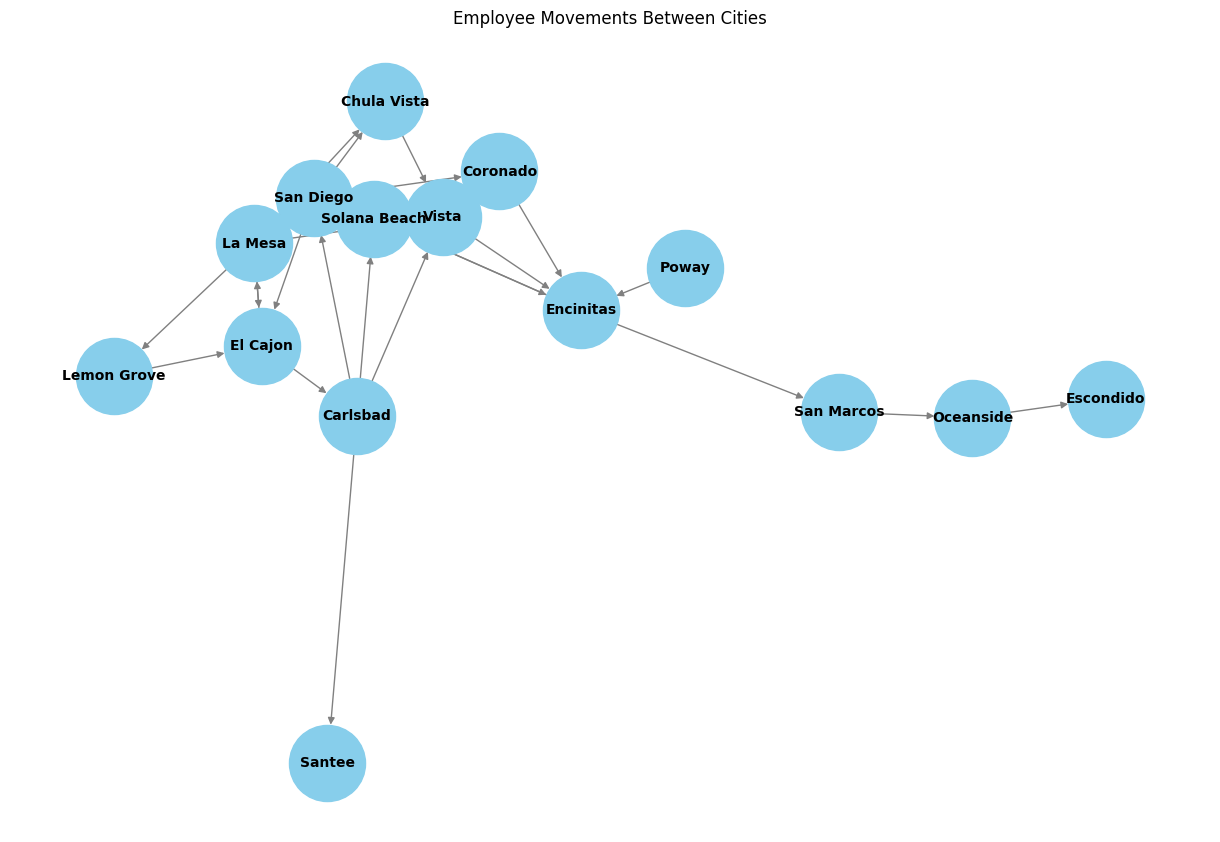

In [246]:
# Create an empty directed graph
G = nx.DiGraph()

# Add edges between cities for each individual who has worked in multiple cities
for name, group in filtered_movements_df.groupby('Name'):
    cities = group['City'].unique()
    if len(cities) > 1:
        for i in range(len(cities) - 1):
            G.add_edge(cities[i], cities[i + 1])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Employee Movements Between Cities")
plt.show()


In [247]:
'''filtered_df.loc[filtered_df['Job title'].str.contains(position, case=False, na=False), 'Job title'] = position
filtered_df['Job title'].unique()'''

"filtered_df.loc[filtered_df['Job title'].str.contains(position, case=False, na=False), 'Job title'] = position\nfiltered_df['Job title'].unique()"

In [248]:
grouped_df = df.groupby(['Year', 'City']).agg(
    PositionCount=('Job title', 'size'),
    MedianWages=('Adjusted regular pay + other pay + benefits', 'median')
).reset_index()

grouped_df.columns = ['Year', 'City', 'NumEmpls', 'AdjMedianWage']
grouped_df

,Year,City,NumEmpls,AdjMedianWage
0,2011,Carlsbad,50,124965.520000
1,2011,Chula Vista,90,88545.745000
2,2011,Coronado,32,121450.780000
3,2011,El Cajon,38,118052.560000
4,2011,Encinitas,38,105990.440000
...,...,...,...,...
212,2023,El Cajon,42,122563.960784
213,2023,Encinitas,46,124010.928432
214,2023,Escondido,64,122604.976631
215,2023,Oceanside,71,120211.278173


In [249]:
grouped_df['NumEmpls%Chg'] = grouped_df.groupby(['City'])['NumEmpls'].pct_change()
grouped_df['AdjMedianWage%Chg'] = grouped_df.groupby(['City'])['AdjMedianWage'].pct_change()

#grouped_df.to_csv(f"C:/Users/Ericm\PycharmProjects\wageData\.venv\Scripts/{position}_RoC.csv")

grouped_df

,Year,City,NumEmpls,AdjMedianWage,NumEmpls%Chg,AdjMedianWage%Chg
0,2011,Carlsbad,50,124965.520000,NaN,NaN
1,2011,Chula Vista,90,88545.745000,NaN,NaN
2,2011,Coronado,32,121450.780000,NaN,NaN
3,2011,El Cajon,38,118052.560000,NaN,NaN
4,2011,Encinitas,38,105990.440000,NaN,NaN
...,...,...,...,...,...,...
212,2023,El Cajon,42,122563.960784,0.135135,0.111171
213,2023,Encinitas,46,124010.928432,-0.021277,-0.011582
214,2023,Escondido,64,122604.976631,-0.015385,0.038058
215,2023,Oceanside,71,120211.278173,-0.040541,0.030951


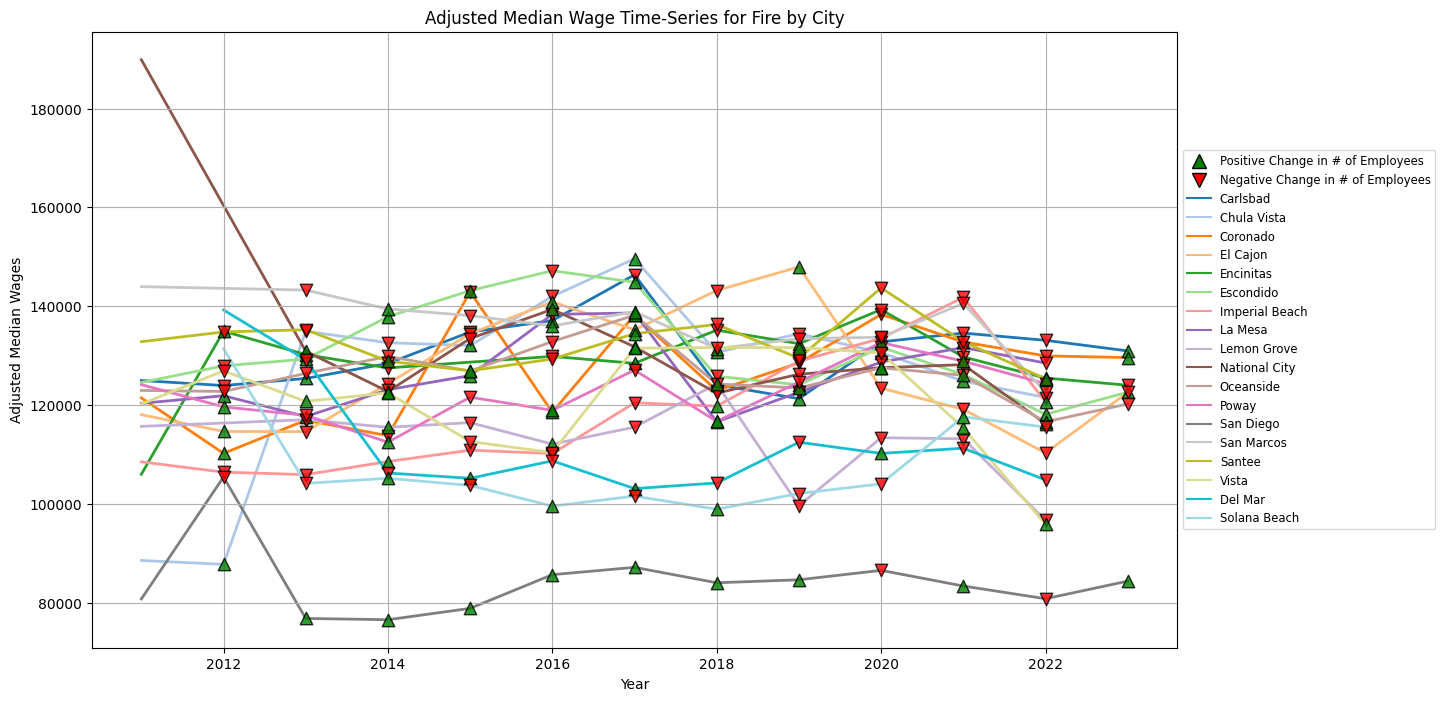

In [250]:
# If position is not null, filter for that position only
def plot_wage_timeseries(df, position, filter, save_path=None):
    # Convert columns to appropriate types
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['NumEmpls%Chg'] = pd.to_numeric(df['NumEmpls%Chg'], errors='coerce')
    df['AdjMedianWage'] = pd.to_numeric(df['AdjMedianWage'], errors='coerce')
    
    # Filter by position if provided
    if filter:
        df = df[df['Job title'] == filter]
    
    # Get a list of cities in the dataset
    cities = df['City'].unique()
    
    # Use a distinct color map that can generate unique colors for each city
    num_cities = len(cities)
    cmap = plt.get_cmap('tab20', num_cities)  # 'tab20' is good for categorical data with many distinct colors
    
    # Plotting
    plt.figure(figsize=(14, 8))

    city_colors = {}

    for i, city in enumerate(cities):
        city_data = df[df['City'] == city]
        
        # Separate the data into positive and negative employee change
        positive_change = city_data[city_data['NumEmpls%Chg'] > 0]
        negative_change = city_data[city_data['NumEmpls%Chg'] <= 0]
        
        # Assign and store a unique color for each city from the colormap
        color = cmap(i)
        city_colors[city] = color
        
        # Plot time-series for the city without markers on the line
        plt.plot(city_data['Year'], city_data['AdjMedianWage'], label=city, color=color, linestyle='-', linewidth=2, zorder=1)
        
        # Overlay smaller markers for positive and negative employee changes with higher zorder
        plt.scatter(positive_change['Year'], positive_change['AdjMedianWage'], 
                    color='green', marker='^', s=80, edgecolor='black', alpha=0.8, zorder=2)
        plt.scatter(negative_change['Year'], negative_change['AdjMedianWage'], 
                    color='red', marker='v', s=80, edgecolor='black', alpha=0.8, zorder=2)
    
    plt.title(f'Adjusted Median Wage Time-Series for {position} by City')
    plt.xlabel('Year')
    plt.ylabel('Adjusted Median Wages')
    
    # Create custom handles for the legend to only show one instance of the markers
    custom_handles = [
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Positive Change in # of Employees', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='red', markersize=10, label='Negative Change in # of Employees', markeredgecolor='black')
    ]
    
    # Add city-specific handles with unique colors
    city_handles = [plt.Line2D([0], [0], color=city_colors[city], label=city) for city in cities]
    
    plt.legend(handles=custom_handles + city_handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    plt.grid(True)
    
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')  # Use bbox_inches='tight' to avoid cutting off the legend
    
    
    plt.show()

# Example usage with your DataFrame
plot_wage_timeseries(grouped_df, position=position, filter = None, save_path=f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position.replace(' ', '')}WagesNumEmployeesRoCViz.pdf")

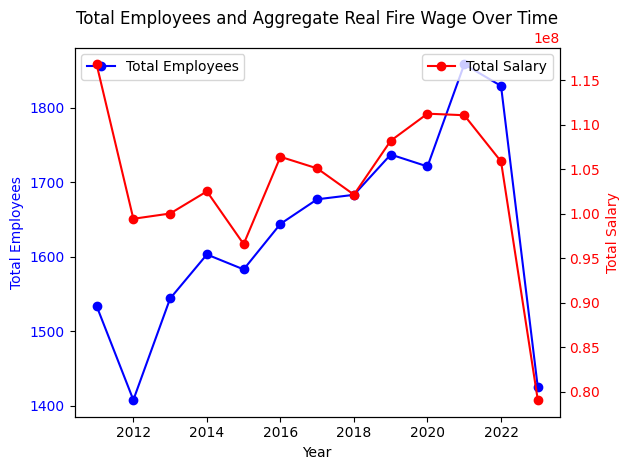

In [251]:
# Group by 'Year' to calculate total number of employees and total aggregate salary
yearly_data = df.groupby('Year').agg(
    total_employees=('Name', 'count'),  # Count of rows per year (total employees)
    total_salary=('Adjusted regular pay', 'sum')  # Sum of 'Regular pay' per year (total salary)
).reset_index()

# Plotting the data
fig, ax1 = plt.subplots()

# Plot total number of employees on the first axis
ax1.plot(yearly_data['Year'], yearly_data['total_employees'], color='blue', marker='o', label='Total Employees')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Employees', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the total salary
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['total_salary'], color='red', marker='o', label='Total Salary')
ax2.set_ylabel('Total Salary', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title
plt.title(f'Total Employees and Aggregate Real {position} Wage Over Time')

# Show plot with legends
fig.tight_layout()  # Adjust layout to prevent overlap
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig(f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position.replace(' ', '')}WagesNumEmployeesViz.pdf", bbox_inches='tight')

plt.show()

In [252]:
# Convert 'City' to numeric codes if necessary
grouped_df['City'] = grouped_df['City'].astype('category').cat.codes
grouped_df['Year'] = pd.to_numeric(grouped_df['Year'])

# Create a lagged variable for NumEmpls%Chg by shifting it by 1 year within each city
#grouped_filtered_df['NumEmpls%Chg_Lagged'] = grouped_filtered_df.groupby('City')['NumEmpls%Chg'].shift(1)

# Define the dependent variable
y = pd.to_numeric(grouped_df['AdjMedianWage%Chg'], errors='coerce')

# Define the independent variables
X = grouped_df[['City', 'Year', 'NumEmpls%Chg']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Drop missing values that resulted from the lagging operation
X = X.dropna()
y = y[X.index]

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      AdjMedianWage%Chg   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     4.168
Date:                Mon, 26 Aug 2024   Prob (F-statistic):            0.00689
Time:                        16:52:08   Log-Likelihood:                 209.32
No. Observations:                 199   AIC:                            -410.6
Df Residuals:                     195   BIC:                            -397.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0994      3.780      1.613   